<a href="https://colab.research.google.com/github/dtype2100/DeepLearning/blob/master/220902_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/taehojo/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 787, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 787 (delta 4), reused 1 (delta 0), pack-reused 776
Receiving objects: 100% (787/787), 46.72 MiB | 45.17 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/deeplearning/data/wine.csv')

In [ ]:
df.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 15.1524 - accuracy: 0.2484 - val_loss: 11.2405 - val_accuracy: 0.2402
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 8.3668 - accuracy: 0.2484 - val_loss: 5.2866 - val_accuracy: 0.2402
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 3.3534 - accuracy: 0.2484 - val_loss: 2.2153 - val_accuracy: 0.2402
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 2.0774 - accuracy: 0.2484 - val_loss: 1.9843 - val_accuracy: 0.2402
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 1.8383 - accuracy: 0.2484 - val_loss: 1.7246 - val_accuracy: 0.2402
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5844 - accuracy: 0.2484 - val_loss: 1.4738 - val_accuracy: 0.2402
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 1.3527 - accuracy: 0.2484 - val_loss: 1.2574 - val_accuracy: 0.2402
Epoch 8/50
8/8 [===============

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

41/41 [==============================] - 0s 869us/step - loss: 0.4903 - accuracy: 0.9362
0.9361538290977478


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/deeplearning/data/wine.csv')

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelpath = '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath, vervose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, verbose=0, callbacks=[checkpoint])

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 925us/step - loss: 0.0822 - accuracy: 0.9746
Test accuracy: 0.9746153950691223


In [ ]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.091192,0.970490,0.110295,0.966128
1,0.093593,0.971260,0.108574,0.958430
2,0.091327,0.972286,0.108670,0.961509
3,0.092662,0.968694,0.105977,0.967667
4,0.090206,0.972543,0.105040,0.966898
...,...,...,...,...
1995,0.039531,0.989222,0.095203,0.980754
1996,0.027398,0.992558,0.089678,0.989222
1997,0.019335,0.995381,0.153300,0.977675
1998,0.027291,0.992815,0.139970,0.981524


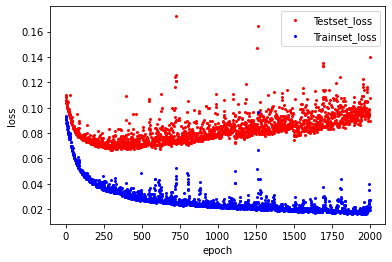

In [ ]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

df = pd.read_csv('/content/deeplearning/data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[checkpoint])

Epoch 1/2000
8/8 [==============================] - 1s 22ms/step - loss: 1.2226 - accuracy: 0.7619 - val_loss: 0.8759 - val_accuracy: 0.7838
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6086 - accuracy: 0.8009 - val_loss: 0.3649 - val_accuracy: 0.8600
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.8886 - val_loss: 0.3052 - val_accuracy: 0.9177
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.9217 - val_loss: 0.2529 - val_accuracy: 0.9200
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.9215 - val_loss: 0.2262 - val_accuracy: 0.9346
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.9312 - val_loss: 0.2088 - val_accuracy: 0.9369
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.2097 - accuracy: 0.9346 - val_loss: 0.1974 - val_accuracy: 0.9331
Epoch 8/2000
8/8 [=

In [ ]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9885
Test accuracy: 0.9884615540504456


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/deeplearning/data/house_train.csv')

[데이터 정보](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.duplicated().sum()

0

In [ ]:
def info_df(df):
    info_df = pd.DataFrame({
        'isna': df.isna().sum(),
        'isnull': df.isnull().sum()})
    return info_df

In [ ]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

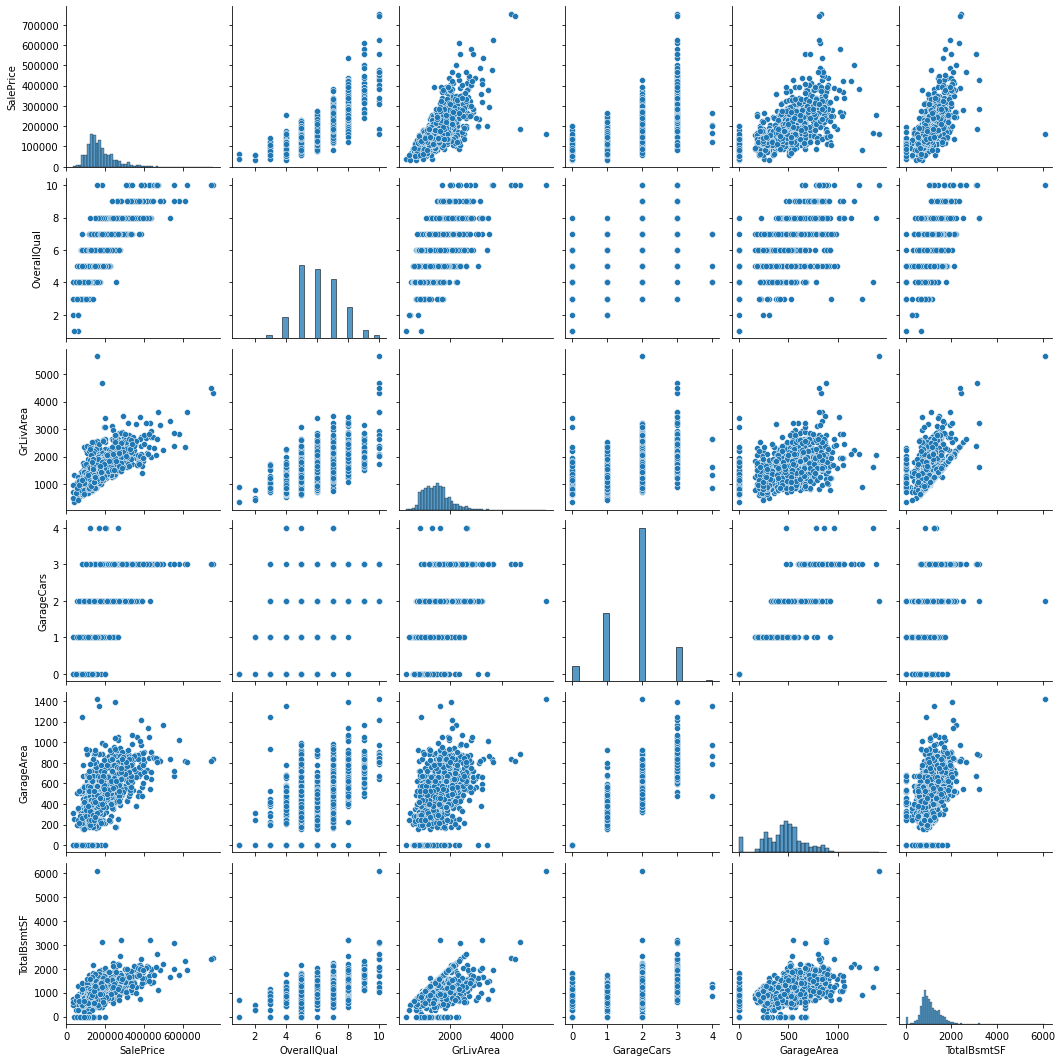

In [ ]:
import seaborn as sns
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(df[cols])
plt.show()

# 주택가격 예측

In [ ]:
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름 설정
modelpath="Ch15-house.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정. 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - 1s 7ms/step - loss: 38738931712.0000 - val_loss: 38295388160.0000
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step 

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 생성
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

실제가격: 147000.00, 예상가격: 117228.52
실제가격: 290000.00, 예상가격: 280381.19
실제가격: 107000.00, 예상가격: 146604.00
실제가격: 284000.00, 예상가격: 326699.47
실제가격: 112000.00, 예상가격: 114231.93
실제가격: 131000.00, 예상가격: 138421.56
실제가격: 170000.00, 예상가격: 184053.05
실제가격: 252678.00, 예상가격: 210180.48
실제가격: 168000.00, 예상가격: 184039.77
실제가격: 117000.00, 예상가격: 141652.39
실제가격: 151500.00, 예상가격: 128846.04
실제가격: 39300.00, 예상가격: 19416.33
실제가격: 262500.00, 예상가격: 245956.28
실제가격: 110500.00, 예상가격: 82429.48
실제가격: 148000.00, 예상가격: 161349.58
실제가격: 103000.00, 예상가격: 157229.23
실제가격: 155000.00, 예상가격: 167193.72
실제가격: 119000.00, 예상가격: 148027.97
실제가격: 160000.00, 예상가격: 187170.34
실제가격: 233170.00, 예상가격: 217914.89
실제가격: 213250.00, 예상가격: 229329.47
실제가격: 144000.00, 예상가격: 128673.08
실제가격: 169000.00, 예상가격: 197819.16
실제가격: 133900.00, 예상가격: 117862.93
실제가격: 275500.00, 예상가격: 252606.12


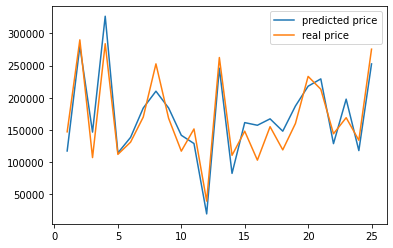

In [ ]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교.
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

# 이미지
* [참고 링크](http://neuralnetworksanddeeplearning.com/chap1.html)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11501568/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


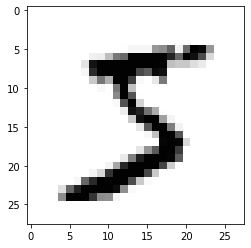

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정구간입니다.
MODEL_DIR = 'model16'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.09919, saving model to MNIST_MLP.hdf5

Epoch 2: val_loss did not improve from 0.09919

Epoch 3: val_loss improved from 0.09919 to 0.09454, saving model to MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.09454 to 0.09046, saving model to MNIST_MLP.hdf5

Epoch 5: val_loss did not improve from 0.09046

Epoch 6: val_loss did not improve from 0.09046

Epoch 7: val_loss did not improve from 0.09046

Epoch 8: val_loss did not improve from 0.09046

Epoch 9: val_loss did not improve from 0.09046

Epoch 10: val_loss did not improve from 0.09046

Epoch 11: val_loss did not improve from 0.09046

Epoch 12: val_loss did not improve from 0.09046

Epoch 13: val_loss did not improve from 0.09046

Epoch 14: val_loss did not improve from 0.09046
313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9820

 Test Accuracy: 0.9820


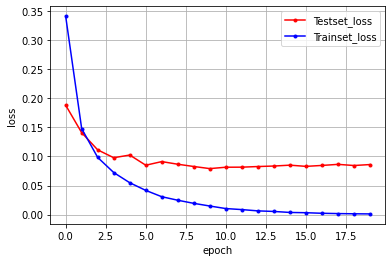

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

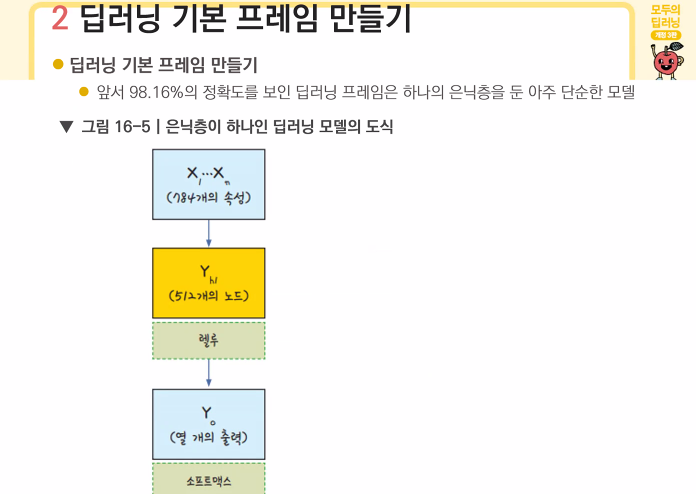

# iris data practice
1. train, test 
2. 딥러닝 모델 업데이트, 베스트 모델 생성
3. 그래프 확인
4. 학습 자동 중단 설정
5. [5.2, 2.6, 1, 1.2] 품종 예측
6. [6.7, 2.8, 6.6, 2] 품종 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/deeplearning/data/iris3.csv')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df.iloc[:,0:4]
y = df.iloc[:, -1]
y = pd.get_dummies(y)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(24, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

accuracy = model.evaluate(X_test, y_test)[1]

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="iris_bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])
model.evaluate(X_test, y_test)

test1 = [5.2, 2.6, 1, 1.2] 
test2 = [6.7, 2.8, 6.6, 2] 

model.predict([test1])
model.predict([test2])

1/1 [==============================] - 0s 227ms/step - loss: 1.1132 - accuracy: 0.3667
Epoch 1/2000
1/1 [==============================] - ETA: 0s - loss: 1.1261 - accuracy: 0.3222
Epoch 1: val_loss improved from inf to 1.12125, saving model to iris_bestmodel.hdf5
1/1 [==============================] - 0s 407ms/step - loss: 1.1261 - accuracy: 0.3222 - val_loss: 1.1213 - val_accuracy: 0.4000
Epoch 2/2000
1/1 [==============================] - ETA: 0s - loss: 1.1000 - accuracy: 0.4667
Epoch 2: val_loss improved from 1.12125 to 1.09465, saving model to iris_bestmodel.hdf5
1/1 [==============================] - 0s 48ms/step - loss: 1.1000 - accuracy: 0.4667 - val_loss: 1.0946 - val_accuracy: 0.6000
Epoch 3/2000
1/1 [==============================] - ETA: 0s - loss: 1.0751 - accuracy: 0.6111
Epoch 3: val_loss improved from 1.09465 to 1.06919, saving model to iris_bestmodel.hdf5
1/1 [==============================] - 0s 37ms/step - loss: 1.0751 - accuracy: 0.6111 - val_loss: 1.0692 - val_acc

array([[1.6073980e-07, 2.8076663e-04, 9.9971908e-01]], dtype=float32)

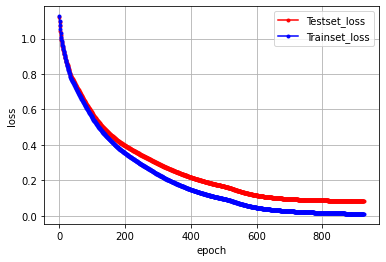

In [ ]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름 설정
modelpath="Ch15-house.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정. 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

In [ ]:
# irir data practice 전체 코드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/deeplearning/data/iris3.csv')

X = df.iloc[:,0:4]
y = df.iloc[:, -1]
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(24, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

accuracy = model.evaluate(X_test, y_test)[1]

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="iris_bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])
model.evaluate(X_test, y_test)

test1 = [5.2, 2.6, 1, 1.2] 
test2 = [6.7, 2.8, 6.6, 2] 

model.predict([test1])
model.predict([test2])

# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()